# 训练过程可视化

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adadelta, Nadam ,Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import  plot_model ,Sequence
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import tensorflow as tf
from tensorflow.python.keras.losses import binary_crossentropy
from scipy.ndimage import morphology as mp
from PIL import Image,UnidentifiedImageError
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import shutil
import os
from glob import glob  # for getting list paths of image and labels
from random import choice,sample
from matplotlib import pyplot as plt
import cv2 # saving and loading images

print("环境准备完毕")

2024-07-23 15:22:52.333973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 15:22:54.239828: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


环境准备完毕


### 数据集加载

In [3]:
data = pd.read_csv('result/training_history.csv')
data_Unet = pd.read_csv('../Semantic_Segmentation_Surgery-Tools_U-Net/result/training_history.csv')

### 模型评价指标获取

In [4]:
loss = data["loss"]
dice_coef = data["dice_coef"]
iou = data["iou"]
recall = data["recall"]
precision = data["precision"]

val_loss = data["val_loss"]
val_dice_coef = data["val_dice_coef"]
val_iou = data["val_iou"]
val_recall = data["val_recall"]
val_precision = data["val_precision"]



loss_Unet = data_Unet["loss"]
dice_coef_Unet = data_Unet["dice_coef"]
iou_Unet = data_Unet["iou"]
recall_Unet = data_Unet["recall"]
precision_Unet = data_Unet["precision"]

val_loss_Unet = data_Unet["val_loss"]
val_dice_coef_Unet = data_Unet["val_dice_coef"]
val_iou_Unet = data_Unet["val_iou"]
val_recall_Unet = data_Unet["val_recall"]
val_precision_Unet = data_Unet["val_precision"]

### 绘图函数

In [22]:
def vision_plot(data1,data2,lab1,lab2):
    plt.plot(data1,label = lab1)
    plt.plot(data2,label = lab2)
    plt.xlabel("iterations")
    plt.ylabel(lab1)
    plt.legend()

### 训练集效果 

<Figure size 640x480 with 0 Axes>

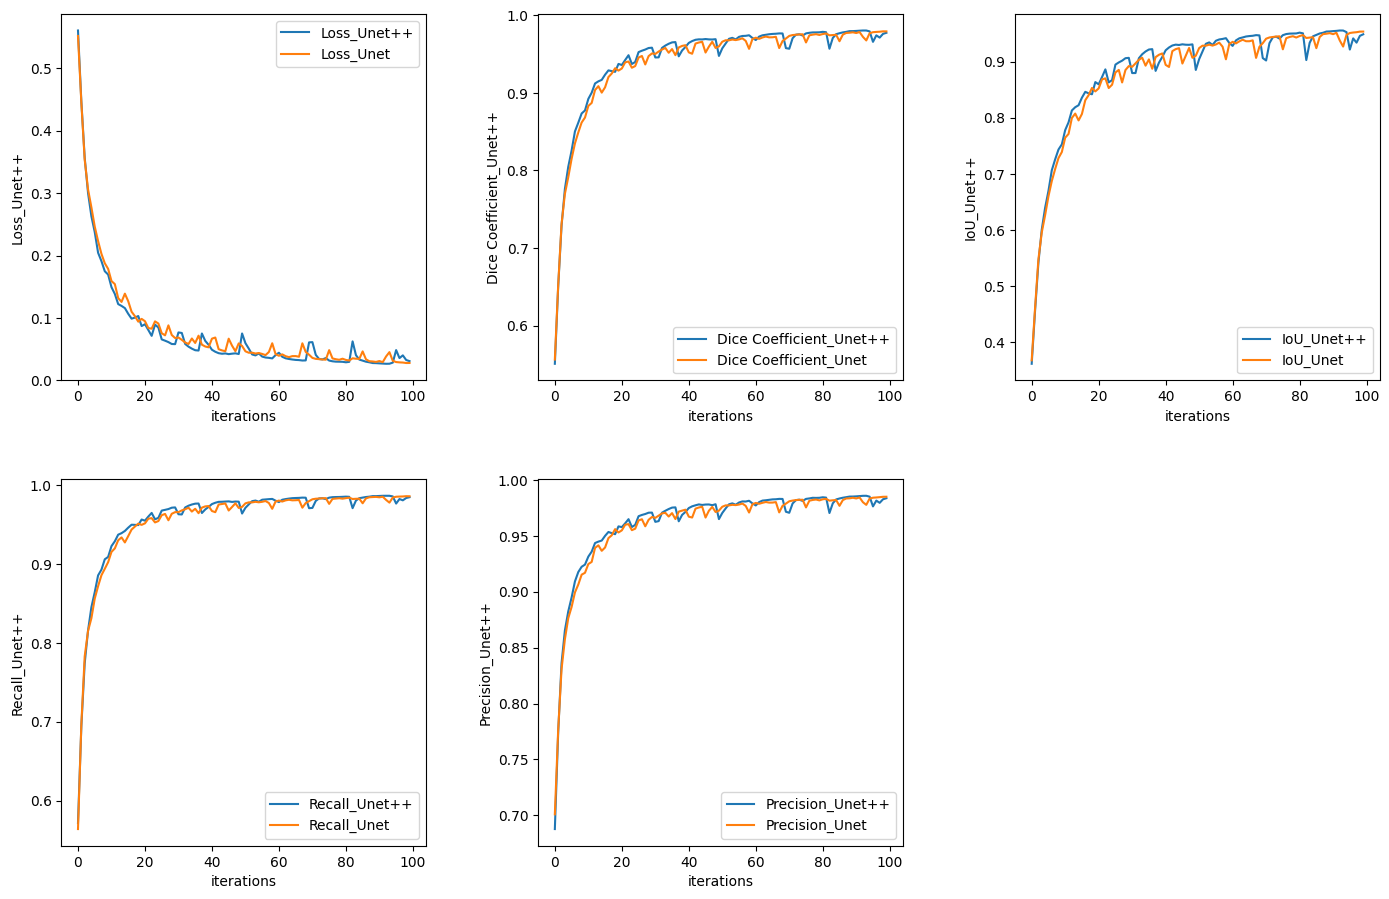

In [24]:
plt.figure()
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=5.0)

# 绘制各个指标的图像
plt.subplot(231)
vision_plot(loss,loss_Unet, "Loss_Unet++","Loss_Unet")
plt.subplot(232)
vision_plot(dice_coef,dice_coef_Unet, "Dice Coefficient_Unet++", "Dice Coefficient_Unet")
plt.subplot(233)
vision_plot(iou,iou_Unet, "IoU_Unet++", "IoU_Unet")
plt.subplot(234)
vision_plot(recall,recall_Unet, "Recall_Unet++", "Recall_Unet")
plt.subplot(235)
vision_plot(precision,precision_Unet, "Precision_Unet++", "Precision_Unet")

# 删除空白子图
fig.delaxes(ax[1, 2])

plt.savefig("piture_train_process")

### 测试集效果 

<Figure size 640x480 with 0 Axes>

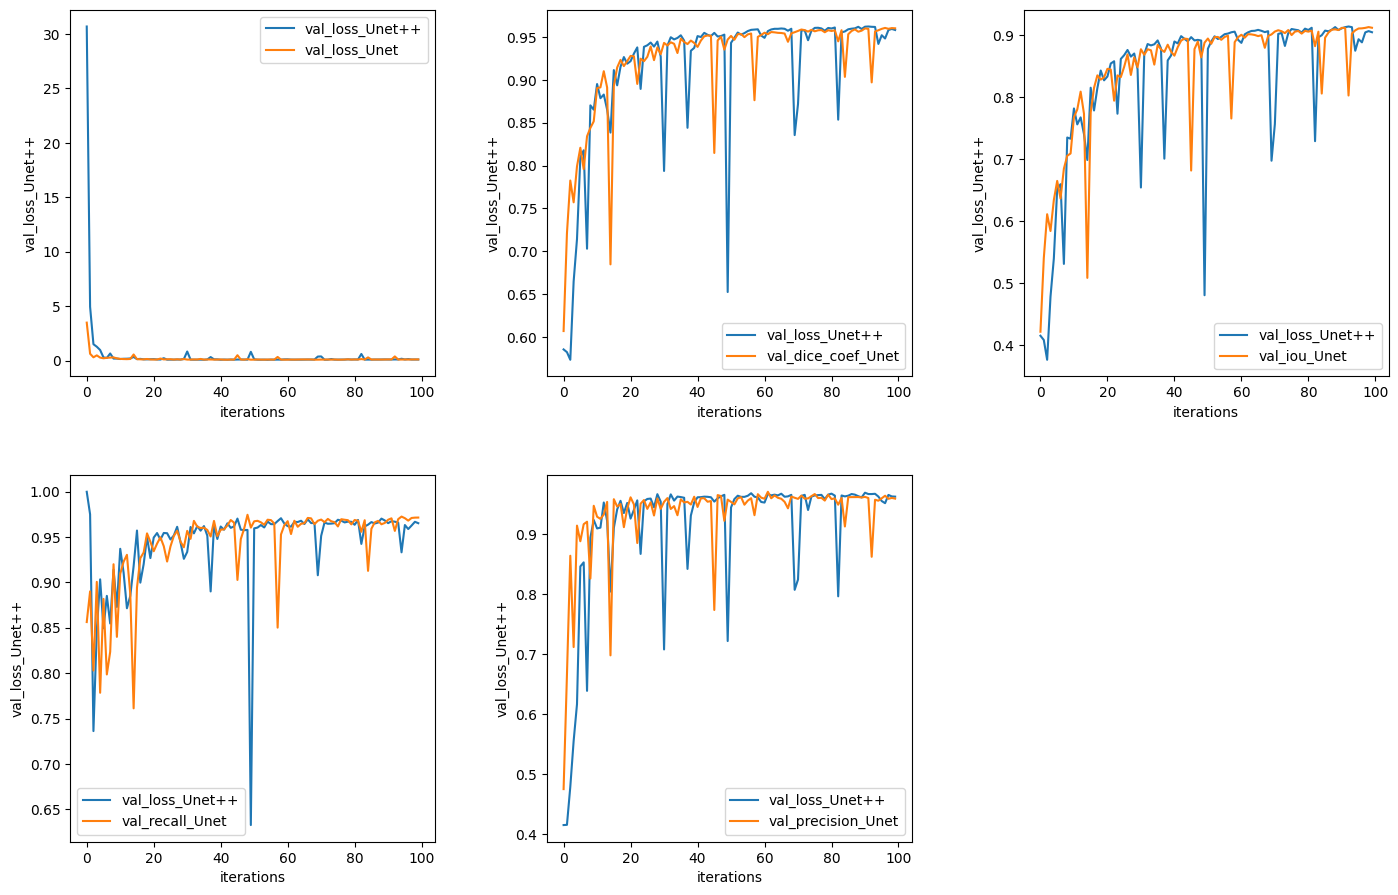

In [25]:
plt.figure()
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=5.0)

plt.subplot(231)
vision_plot(val_loss,val_loss_Unet,"val_loss_Unet++","val_loss_Unet")
plt.subplot(232)
vision_plot(val_dice_coef,val_dice_coef_Unet,"val_loss_Unet++","val_dice_coef_Unet")
plt.subplot(233)
vision_plot(val_iou,val_iou_Unet,"val_loss_Unet++","val_iou_Unet")
plt.subplot(2,3,4)
vision_plot(val_recall,val_recall_Unet,"val_loss_Unet++","val_recall_Unet")
plt.subplot(2,3,5)
vision_plot(val_precision,val_precision_Unet,"val_loss_Unet++","val_precision_Unet")

# 删除空白子图
fig.delaxes(ax[1, 2])

plt.savefig("piture_val_process")